In [10]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 6.3 MB 6.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=c12ccb970be2f64e0f49cf331a661d42087fd01c5605cdcd54d96463b3b0a0ab
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=f4339b82807dbfbb267ad0abc65162c0f735d95fad2e6ce7fca29660b4fa8813
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [39]:
import pandas as pd
import yfinance as yf
import yahoofinancials

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

In [40]:
def plot_tickers(tickers, start, end, interval, track, log_plot, normalize):
    data_df = yf.download(tickers,
                          start=start,
                          end=end,
                          interval=interval,
                          progress=False)

    # Drop any NaNs (e.g. when comparing SPY to 'BTC-USD')
    data_df = data_df.dropna()

    # normalize df
    if normalize == True:
        data_df = (data_df - data_df.mean()) / data_df.std()
    else:
        pass

    # Plot tickers
    ticker_list = tickers.split(' ')

    for ticker in ticker_list:
        if ticker == 'BTC-USD':  # put BTC on right axis
            ax = data_df[track, ticker].plot(secondary_y=True, figsize=(14, 10), legend=True, logy=log_plot, grid=True)
        else:
            ax = data_df[track, ticker].plot(figsize=(14, 10), legend=True, logy=log_plot, grid=True)

    ax.get_legend().set_bbox_to_anchor((1.3, 1))

    return data_df


def calc_correlation(data_df, track):
    # Get correlation and sort by sum
    sum_corr = data_df[track].corr().sum().sort_values(ascending=True).index.values

    data_df[track][sum_corr].corr()

    # Call the df with the list from summed correlation, sorted ascending.
    plt.figure(figsize=(13, 8))
    ax = sns.heatmap(data_df[track][sum_corr].corr(),
                     annot=True,
                     cmap="Blues")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


In [55]:
# Enter tickers to plot/compare
tickers = 'BTC-USD ETH-USD SPY'

# Timeframe
start = '{}'.format(start)
end = '{}'.format(today)

# Time interval: can be 1m, 1h, 1d
interval = '1d'

# key to track: 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'
track = 'Close'

# plot options
log_plot = False
normalize = True


In [56]:
# how many days the correlation is looking at
today = date.today()
d = datetime.timedelta(days=360)
start = today - d

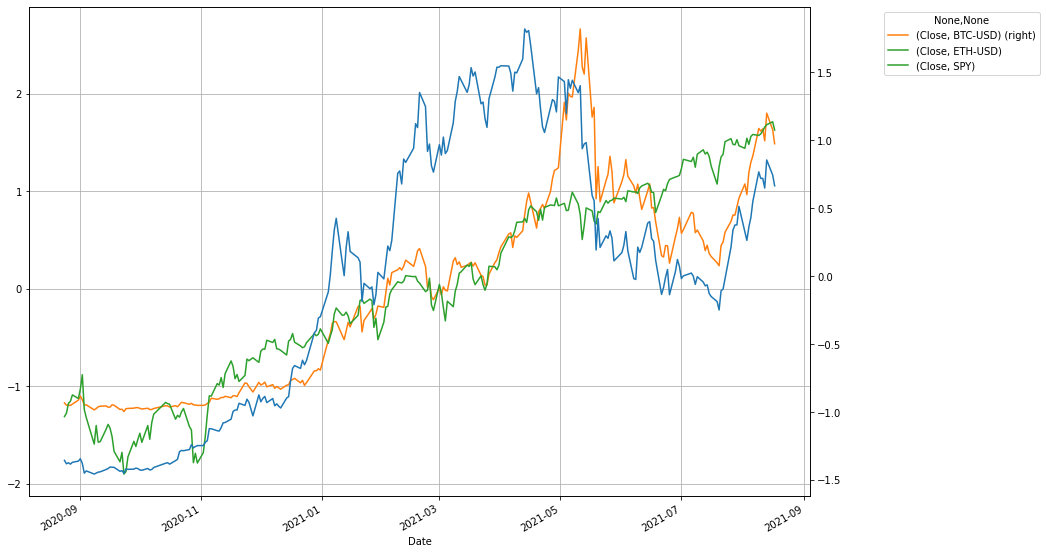

In [57]:
data_df = plot_tickers(tickers, start, end, interval, track, log_plot, normalize)

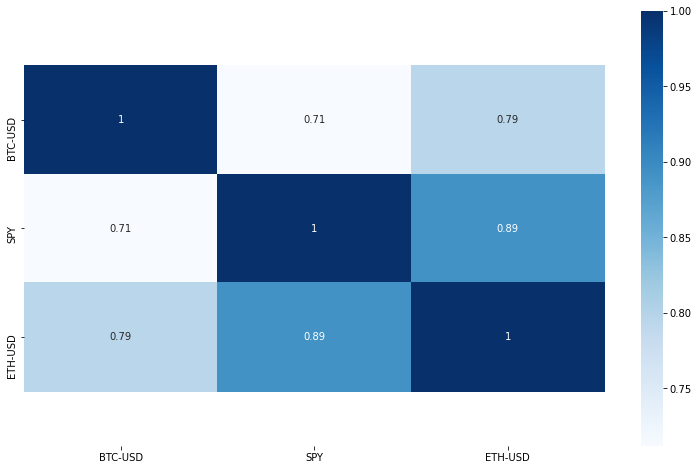

In [58]:
calc_correlation(data_df, track)

In [59]:
# charts for 2 years 
today = date.today()
d = datetime.timedelta(days=730)
start = today - d

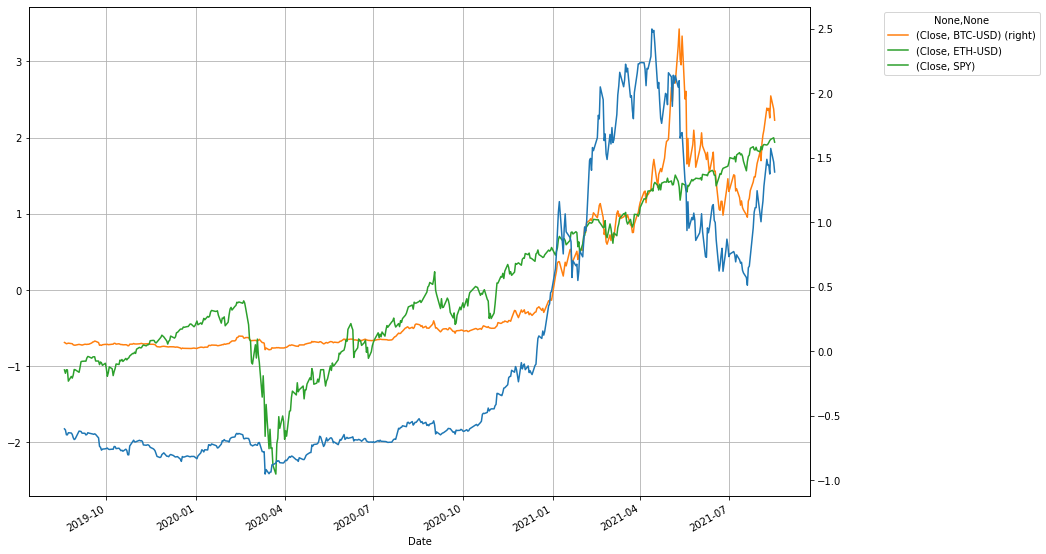

In [60]:
data_df = plot_tickers(tickers, start, end, interval, track, log_plot, normalize)

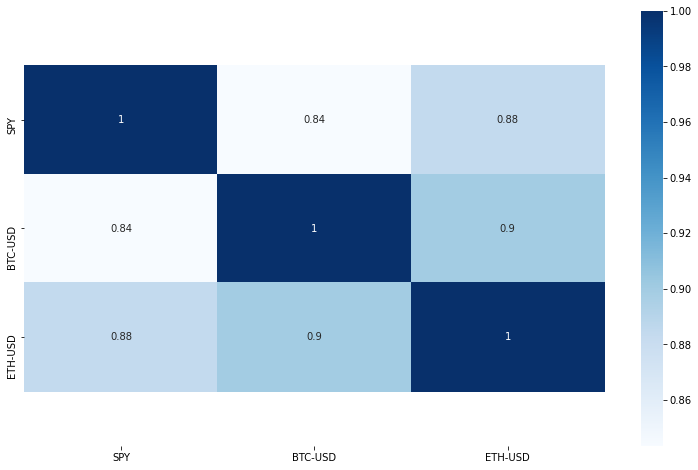

In [61]:
calc_correlation(data_df, track)